Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
#Importing necessary libraries and dataset into python

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
iris=pd.read_excel('iris.xls')
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.shape

(150, 5)

In [8]:
iris.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
iris.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [10]:
iris.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x56ae264940>,
 'caps': [<matplotlib.lines.Line2D at 0x56ae264fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x56ae264670>,
 'medians': [<matplotlib.lines.Line2D at 0x56adbac5e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x56adac6310>,
 'means': []}

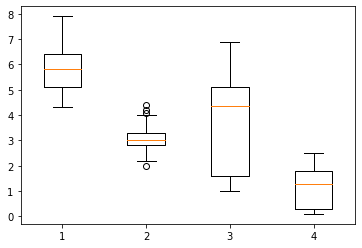

In [11]:
plt.boxplot([iris['SL'],iris['SW'],iris['PL'],iris['PW']])

In [12]:
iris['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

<AxesSubplot:>

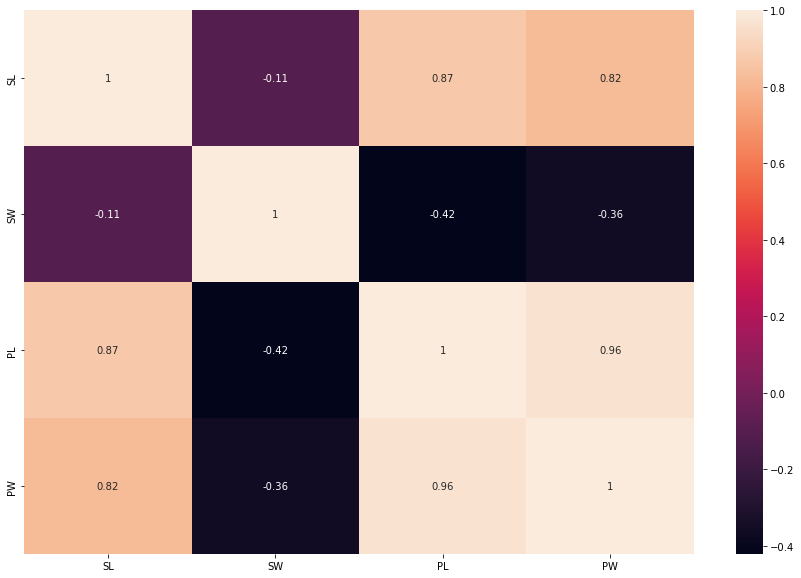

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(iris.corr(),annot=True)

# Data preprocessing

In [14]:
#label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
iris['Classification'] = le.fit_transform(iris['Classification'])
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
#splitting data into variables x and y

x = iris.drop(['Classification'],axis=1)
y = iris['Classification']

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [18]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (120, 4)
x_test: (30, 4)
y_train: (120,)
y_test: (30,)


In [19]:
model_train_acc=[]
model_test_acc=[]

In [20]:
#1.logistic regression

from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)


y_pred = log_model.predict(x_test)

In [21]:
print("Test accuracy is:", accuracy_score(y_test, y_pred))

Test accuracy is: 1.0


<AxesSubplot:>

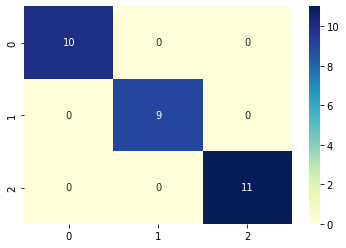

In [22]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [23]:
#2.SVM

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_SVC= classifier.predict(x_test)

In [24]:
print('Accuracy Score is:', accuracy_score(y_test, y_pred_SVC))

Accuracy Score is: 1.0


<AxesSubplot:>

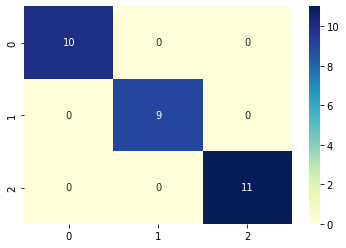

In [25]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [26]:
#3.Decision tree

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree_train = dtree.predict(x_train)
dtree_pred = dtree.predict(x_test)
dtree_acc = accuracy_score(dtree_pred,y_test)

print("Accuracy Score on test data using Decision tree:",dtree_acc)

Accuracy Score on test data using Decision tree: 1.0


<AxesSubplot:>

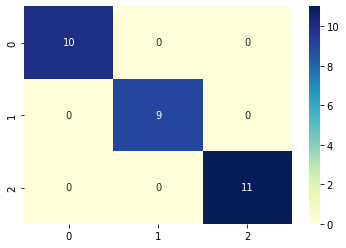

In [27]:
cm = confusion_matrix(dtree_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [28]:
#4.KNN
acc_values = []
neighbours = np.arange(3,15)
for k in neighbours:
     classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
     classifier.fit(x_train,y_train)
     y_pred = classifier.predict(x_test)
     acc = accuracy_score(y_test,y_pred)
     acc_values.append(acc)

In [29]:
acc_values

[1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [30]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test, y_pred))

Accuracy Score is: 1.0


<AxesSubplot:>

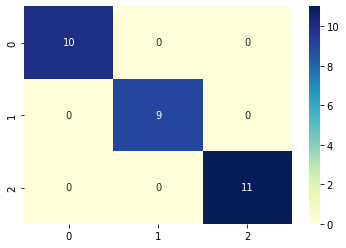

In [31]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [32]:
#5.Random forest

rc=RandomForestClassifier()
rc.fit(x_train,y_train)

y_pred=rc.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

<AxesSubplot:>

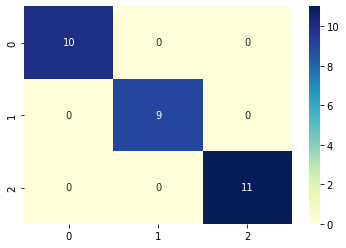

In [33]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="YlGnBu")

All the test model shows 100% accuracy.So one among the five models can be selected.

***********